<a href="https://colab.research.google.com/github/garfield-gray/NeuralNetwork/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import tensorflow as tf

import sklearn as sl
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb


In [33]:
d = datasets.load_breast_cancer()
x = d.data
y = d.target

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (455, 30)
Size of the training set: 455
Shape of the testing set: (114, 30)
Size of the testing set: 114


In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32 ,activation='relu',input_shape=(30,)),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                992       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [52]:
def L(epoch , Ir):
  if epoch < 2:
    return Ir
  else:
    return Ir*np.exp(-0.2)
  
E = tf.keras.callbacks.EarlyStopping(patience=3 , monitor = 'val_acc')
L = tf.keras.callbacks.LearningRateScheduler(L)

In [55]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train , validation_split=0.1,epochs=100,batch_size=32, callbacks=[E, L])

Epoch 1/100
13/13 [==============================] - 1s 25ms/step - loss: 0.6138 - accuracy: 0.8044 - val_loss: 0.4682 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2797 - accuracy: 0.9144 - val_loss: 0.3659 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1827 - accuracy: 0.9291 - val_loss: 0.3016 - val_accuracy: 0.9130 - lr: 8.1873e-04
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1814 - accuracy: 0.9267 - val_loss: 0.2993 - val_accuracy: 0.9130 - lr: 6.7032e-04
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.9169 - val_loss: 0.3120 - val_accuracy: 0.9130 - lr: 5.4881e-04
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1724 - accuracy: 0.9340 - val_loss: 0.2200 - val_accuracy: 0.9130 - lr: 4.4933e-04
Epoch 7/100
13/13 [==============================] - 0s 7ms

In [56]:
y_pred_float = model.predict_step(x_test)  
y_pred = np.round(y_pred_float)

In [57]:
target_list=['benign','malignant']
sl.metrics.classification_report(y_true=y_test,y_pred=y_pred,output_dict = True,target_names=target_list)

{'accuracy': 0.9298245614035088,
 'benign': {'f1-score': 0.9111111111111112,
  'precision': 0.9534883720930233,
  'recall': 0.8723404255319149,
  'support': 47},
 'macro avg': {'f1-score': 0.9265700483091788,
  'precision': 0.9344906649197511,
  'recall': 0.9212448396316291,
  'support': 114},
 'malignant': {'f1-score': 0.9420289855072463,
  'precision': 0.9154929577464789,
  'recall': 0.9701492537313433,
  'support': 67},
 'weighted avg': {'f1-score': 0.9292821425544538,
  'precision': 0.931157733836721,
  'recall': 0.9298245614035088,
  'support': 114}}

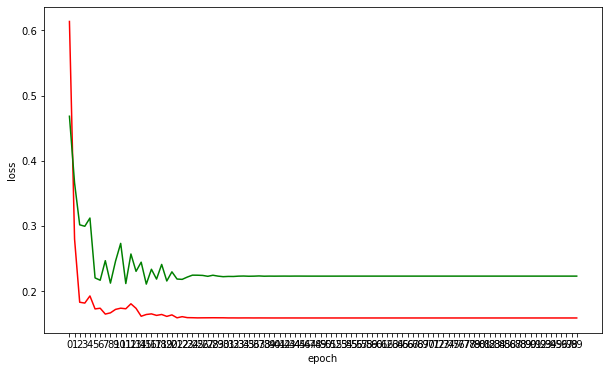

In [58]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'train', color='r')
plt.plot(history.history['val_loss'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(0, 100, 1))
plt.show()

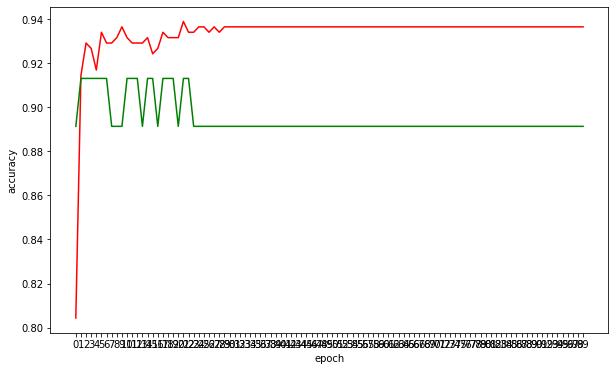

In [59]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'train', color='r')
plt.plot(history.history['val_accuracy'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 100, 1))
plt.show()

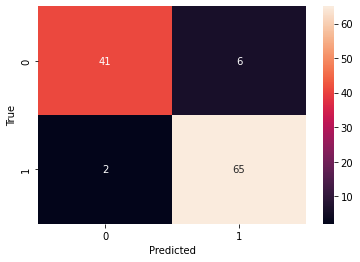

In [60]:
CM = sl.metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()